# Potential Energy Curve for a Homonuclear Diatomic Molecule



## Setup python environment and imports

In [1]:
%%capture
!pip install pyscf


In [2]:
# pyscf imports:
from pyscf import gto, scf, mp, ci, cc

from pyscf.data.nist import HARTREE2EV

# For plotting
import matplotlib
from matplotlib import pyplot as plt

# For numerics:
import numpy as np

## Definition of the Molecule

Here you should define the homonuclear diatomic molecule to be considered.



In [3]:
Atom="N"

## Definition of the Functions to Generate the XYZ Coordiates and Calculations

In [4]:
def get_xyz(bondlength,atom="N"):
  xyz="{:2s} {:10.6f} {:10.6f} {:10.6f}\n".format(atom,bondlength/2,0.0,0.0)
  xyz+="{:2s} {:10.6f} {:10.6f} {:10.6f}\n".format(atom,-bondlength/2,0.0,0.0)
  return xyz

In [6]:
def run_calculation_hf(xyz, basis="cc-pvdz"):
    """Calculate the energy (+ additional things like MO coefficients) with pyscf."""
    mol = gto.M(
        atom=xyz,
        basis=basis,
        unit="ANG",
        symmetry=True,
    )
    mol.build()
    mf = mol.RHF().run()
    return mf.e_tot

def run_calculation_mp2(xyz, basis="cc-pvdz"):
    """Calculate the energy (+ additional things like MO coefficients) with pyscf."""
    mol = gto.M(
        atom=xyz,
        basis=basis,
        unit="ANG",
        symmetry=True,
    )
    mol.build()
    mf = mol.UHF().run()
    mf_mp2 = mp.MP2(mf).run()
    return mf_mp2.e_tot

def run_calculation_cisd(xyz, basis="cc-pvdz"):
    """Calculate the energy (+ additional things like MO coefficients) with pyscf."""
    mol = gto.M(
        atom=xyz,
        basis=basis,
        unit="ANG",
        symmetry=True,
    )
    mol.build()
    mf = mol.RHF().run()
    mf_cisd = ci.CISD(mf).run()
    return mf_cisd.e_tot

def run_calculation_ccsd(xyz, basis="cc-pvdz"):
    """Calculate the energy (+ additional things like MO coefficients) with pyscf."""
    mol = gto.M(
        atom=xyz,
        basis=basis,
        unit="ANG",
        symmetry=True,
    )
    mol.build()
    mf = mol.RHF().run()
    mf_ccsd = cc.CCSD(mf).run()
    et = mf_ccsd.ccsd_t()
    return mf_ccsd.e_tot, mf_ccsd.e_tot+et

## Calculations with different correlated methods

In [9]:
bondlengths = np.linspace(0.9,1.6,71)

basis_set="cc-pvdz"

energy_hf    = np.zeros(bondlengths.size)
energy_mp2   = np.zeros(bondlengths.size)
energy_cisd  = np.zeros(bondlengths.size)
energy_ccsd  = np.zeros(bondlengths.size)
energy_ccsdt = np.zeros(bondlengths.size)

for i, bl in enumerate(bondlengths):
  xyz=get_xyz(bondlength=bl,atom=Atom)
  print(bl)
  energy_hf[i] = run_calculation_hf(xyz,basis=basis_set)
  energy_mp2[i] = run_calculation_mp2(xyz,basis=basis_set)
  energy_cisd[i] = run_calculation_cisd(xyz,basis=basis_set)
  energy_ccsd[i], energy_ccsdt[i] = run_calculation_ccsd(xyz,basis=basis_set)

energy_hf_eV = (energy_hf-np.min(energy_hf))*HARTREE2EV
energy_mp2_eV = (energy_mp2-np.min(energy_mp2))*HARTREE2EV
energy_cisd_eV = (energy_cisd-np.min(energy_cisd))*HARTREE2EV
energy_ccsd_eV = (energy_ccsd-np.min(energy_ccsd))*HARTREE2EV
energy_ccsdt_eV = (energy_ccsdt-np.min(energy_ccsdt))*HARTREE2EV



0.9
converged SCF energy = -108.78279893546
converged SCF energy = -108.782798935458  <S^2> = 2.9176661e-12  2S+1 = 1
E(UMP2) = -109.042506649482  E_corr = -0.259707714023785
E(SCS-UMP2) = -109.035440225962  E_corr = -0.252641290503449
converged SCF energy = -108.78279893546
E(RCISD) = -109.0405759848982  E_corr = -0.2577770494381313
converged SCF energy = -108.78279893546
E(CCSD) = -109.054636162964  E_corr = -0.271837227504084
CCSD(T) correction = -0.00707442450054527
0.91
converged SCF energy = -108.805552052029
converged SCF energy = -108.805552052028  <S^2> = 2.6689762e-12  2S+1 = 1
E(UMP2) = -109.067515228334  E_corr = -0.26196317630595
E(SCS-UMP2) = -109.060338156047  E_corr = -0.254786104018807
converged SCF energy = -108.805552052029
E(RCISD) = -109.0650075558735  E_corr = -0.2594555038441153
converged SCF energy = -108.805552052029
E(CCSD) = -109.0793663751167  E_corr = -0.2738143230872809
CCSD(T) correction = -0.00726261178232727
0.92
converged SCF energy = -108.826217477238

### Analysis of Results

Equilibrium bond length:
 HF:      1.08 Angstrom
 MP2:     1.13 Angstrom
 CISD:    1.10 Angstrom
 CCSD:    1.11 Angstrom
 CCSD(T): 1.12 Angstrom


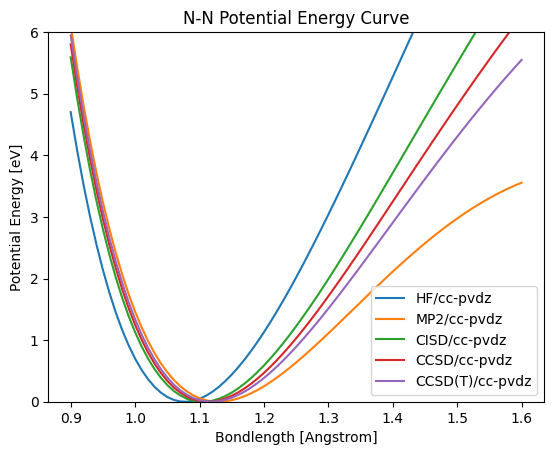

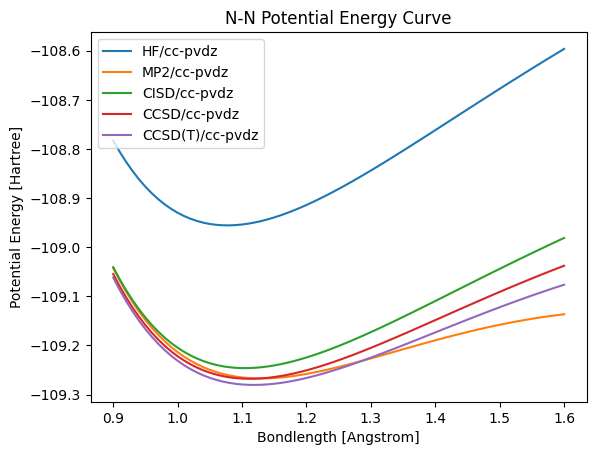

In [11]:
plt.figure(1)
plt.plot(bondlengths,energy_hf_eV,label="HF/{}".format(basis_set))
plt.plot(bondlengths,energy_mp2_eV,label="MP2/{}".format(basis_set))
plt.plot(bondlengths,energy_cisd_eV,label="CISD/{}".format(basis_set))
plt.plot(bondlengths,energy_ccsd_eV,label="CCSD/{}".format(basis_set))
plt.plot(bondlengths,energy_ccsdt_eV,label="CCSD(T)/{}".format(basis_set))
plt.legend()
plt.ylim([0,6])
plt.xlabel("Bondlength [Angstrom]")
plt.ylabel("Potential Energy [eV]")
plt.title("{0}-{0} Potential Energy Curve".format(Atom))

# plt.figure(2)
# plt.plot(bondlengths,energy_hf_eV,label="HF/{}".format(basis_set))
# plt.plot(bondlengths,energy_mp2_eV,label="MP2/{}".format(basis_set))
# plt.plot(bondlengths,energy_cisd_eV,label="CISD/{}".format(basis_set))
# plt.plot(bondlengths,energy_ccsd_eV,label="CCSD/{}".format(basis_set))
# plt.plot(bondlengths,energy_ccsdt_eV,label="CCSD(T)/{}".format(basis_set))
# plt.legend()
# plt.xlim([1.0,1.2])
# plt.ylim([0,2])
# plt.xlabel("Bondlength [Angstrom]")
# plt.ylabel("Potential Energy [eV]")
# plt.title("{0}-{0} Potential Energy Curve".format(Atom))

print("Equilibrium bond length:")
print(" HF:      {:4.2f} Angstrom".format(bondlengths[np.argmin(energy_hf_eV)]))
print(" MP2:     {:4.2f} Angstrom".format(bondlengths[np.argmin(energy_mp2_eV)]))
print(" CISD:    {:4.2f} Angstrom".format(bondlengths[np.argmin(energy_cisd_eV)]))
print(" CCSD:    {:4.2f} Angstrom".format(bondlengths[np.argmin(energy_ccsd_eV)]))
print(" CCSD(T): {:4.2f} Angstrom".format(bondlengths[np.argmin(energy_ccsdt_eV)]))


plt.figure(3)
plt.plot(bondlengths,energy_hf,label="HF/{}".format(basis_set))
plt.plot(bondlengths,energy_mp2,label="MP2/{}".format(basis_set))
plt.plot(bondlengths,energy_cisd,label="CISD/{}".format(basis_set))
plt.plot(bondlengths,energy_ccsd,label="CCSD/{}".format(basis_set))
plt.plot(bondlengths,energy_ccsdt,label="CCSD(T)/{}".format(basis_set))
plt.legend()
plt.xlabel("Bondlength [Angstrom]")
plt.ylabel("Potential Energy [Hartree]")
plt.title("{0}-{0} Potential Energy Curve".format(Atom))

plt.show()